In [2]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from importlib import reload
import os

print("python", sys.version_info)
print("numpy", np.__version__)
print("cv2", cv2.__version__) # type: ignore
print("matplotlib", matplotlib.__version__) # type: ignore
os.chdir("..")
print("cwd", os.getcwd())

python sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
numpy 1.25.1
cv2 4.8.0
matplotlib 3.7.2
cwd /home/oishi/SpectraSpark


In [3]:
import Saxs2dProfile as s2p
import Saxs1dProfile as s1p
import XafsData as xd
import util
reload(s2p)
reload(s1p)
reload(xd)
reload(util)
print(s2p.__version__)
print(s1p.__version__)
print(xd.__version__)
print(util.__version__)

0.0.25
0.0.12
0.0.1
0.0.1


In [ ]:
# center = (714.920, 107.247)
# dir = "testdata/s202/XAFSisoA02/001"
# for file in util.listFiles(dir, ext=".tif"):
#     print(f"processing {file}...", end="")
#     file = os.path.join(dir, file)
#     profile = s2p.Saxs2dProfile.load_tiff(file)
#     profile.auto_mask_invalid()
#     profile.center = center
#     i, bins = profile.radial_average(dr=1.0)
#     r = (bins[:-1] + bins[1:]) / 2
#     dist = file.replace(".tif", ".csv")
#     header = "\n".join([f"src,{file}", f"center,({center[0]}, {center[1]})", "r[px],i"])
#     data = np.vstack([r, i]).T
#     np.savetxt(dist, data, delimiter=",", header=header)
#     print("done")

In [4]:
s202_isoA02_001 = s1p.DafsData("testdata/s202/XAFSisoA02/001", "../isoA02_001.dat", xafscols=(4, 5))
s202_isoA02_001.loadStdinfo("../../Static/stdinfo.csv")

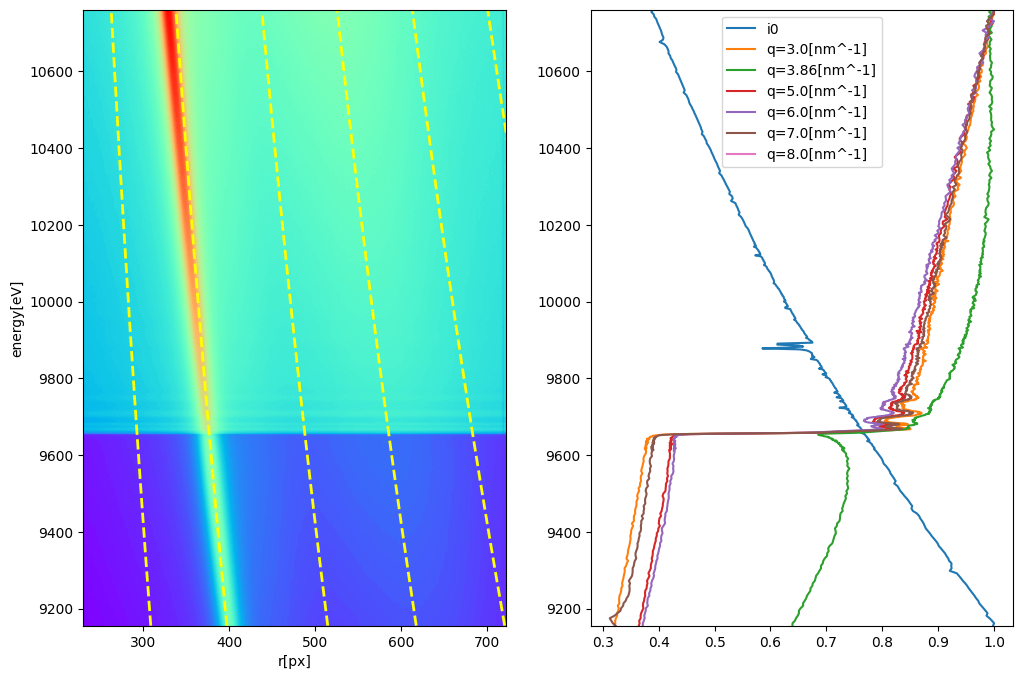

In [9]:
q = np.array([3.0, 3.86, 5, 6, 7, 8])

fig, axs = plt.subplots(1,2,figsize=(12,8))
ax = axs[0]
ax = s202_isoA02_001.heatmap(ax, levels=200)

for qi in q:
    _q = np.full_like(s202_isoA02_001.energy, qi)
    _r = s202_isoA02_001.q2r(_q, s202_isoA02_001.energy)
    ax.plot(
        _r,s202_isoA02_001.energy, label=f"q={qi}[nm^-1]", color="yellow", linewidth=2,
        linestyle="dashed"
    )
ax.set_xlim(s202_isoA02_001.r[0], s202_isoA02_001.r[-1])

ax = axs[1]
ax.plot(s202_isoA02_001.i0/s202_isoA02_001.i0.max(), s202_isoA02_001.energy, label="i0")
for qi in q:
    _i = s202_isoA02_001.q_slice(qi)
    _i = _i / _i.max()
    ax.plot(
        _i, s202_isoA02_001.energy, label=f"q={qi}[nm^-1]"
    )
ax.legend()

for ax in axs:
    ax.set_ylim(s202_isoA02_001.energy[0], s202_isoA02_001.energy[-1])

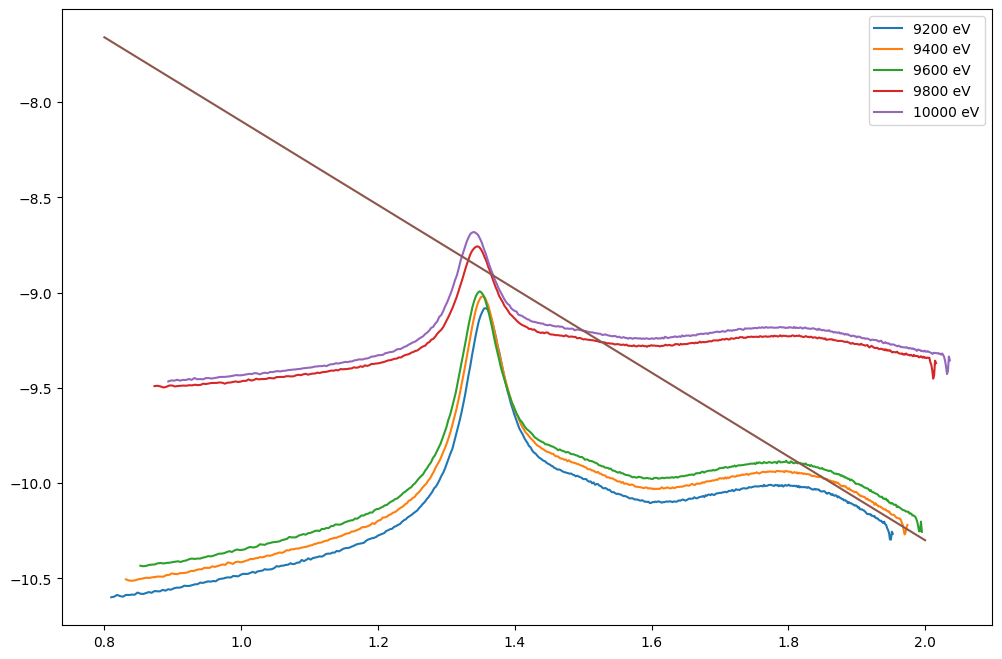

In [28]:
def showEslice(data:s1p.DafsData, e:float):
    i = data.e_slice(e)
    q = data.r2q(data.r, e)
    return q, i

fig, ax = plt.subplots(figsize=(12,8))
for e in (9200, 9400, 9600, 9800, 10000):
    q, i = showEslice(s202_isoA02_001, e)
    ax.plot(np.log(q), np.log(i), label=f"{e} eV")
x = np.linspace(0.8,2.0,7)
y = -2.2*x-5.9
ax.plot(x,y)
# ax.set_ylim(-11,-8.5)
ax.legend()